<a href="https://colab.research.google.com/github/AbdoIbrahim/project2/blob/main/Project_2_Part_2(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Part 2 (Core)
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.  

To meet the requirements for this week you must have:

- deleted unnecessary columns [x]

- deleted duplicate rows [x]

- identified and addressed missing values [x] 

- identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats) [x]

- produced univariate visuals for the target and all features [x]

- identified outliers
[x]
- clearly commented all of your cleaning steps and described any decisions you made  
[x]
Commit your file to your Github repository and submit the link below.


###Import Libraries 

In [1]:
#Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

###Load Data 

In [2]:
#load data
path = '/content/heart.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#Explore the columns of the Dataset 
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

#####There are no duplicate columns and all the columsn contain features that can predict heart disease.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Make A copy of the original dataframe for Machine Learning purposes 
ml_df = df.copy()

#All the columns are related to predicting Heart Disease 

In [6]:
#Check for missing values 
ml_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values 

In [7]:
#Check for null values 
ml_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no Null Values 

In [8]:
#Check for duplicates 
ml_df.duplicated().sum()

0

There are no Duplicates that need to be removed 

#Check Value Counts of all the columns make sure there aren't any inconsistncies. 

In [9]:
#Check Categorcal columns value counts for inconsistincies 

for col in ml_df.select_dtypes('object'):
  print(ml_df[col].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [10]:
#Check Numerical columns value counts for inconsistincies 

for col in ml_df.select_dtypes('number'):
  print(ml_df[col].value_counts())

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64


In [11]:
ml_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
#Check Age Column Value Counts 
ml_df['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

Values look normal for age

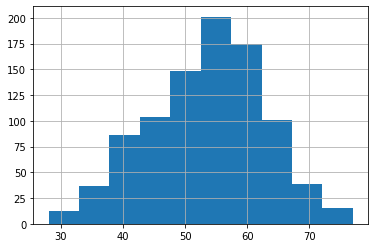

In [13]:
#Lets Explore the age range of the patients 
ml_df['Age'].hist();

The range of patients is from 40 years old to 60 years old


In [14]:
#Check Sex Column Value Counts 

ml_df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

The Value counts of sex look normal

> Indented block



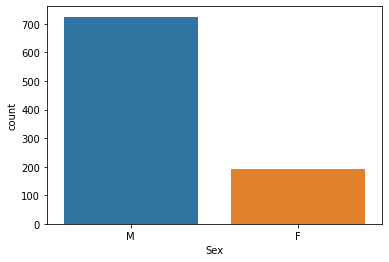

In [15]:
sns.countplot(x="Sex", data=ml_df);


In [16]:
#Locate Columns with 0 as avalue for cholesterol
ml_df[ml_df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [17]:
ml_df['Cholesterol']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

There are 172 rows in choloesterol column that have 0 as a value.   

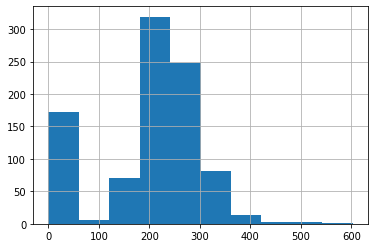

In [18]:
ml_df['Cholesterol'].hist();

### We have a siginifact amount of values labelled as 0 this is likely a data entry error or as a place holder for missing data. 

**I will need to impute the data with mean value of the column in order to replace all of the 172,  0s with meaningful values**

In [19]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

Values for Fasting BS look normal

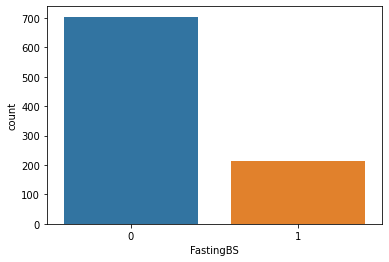

In [20]:
sns.countplot(x="FastingBS", data=ml_df);


In [21]:
ml_df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Values loook normal for this column 

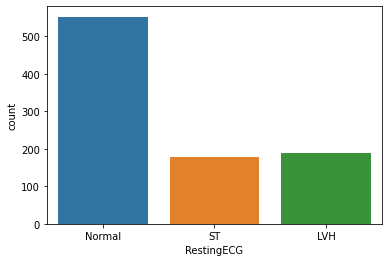

In [22]:
sns.countplot(x="RestingECG", data=ml_df);


In [23]:
df['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

Values look within the normal range

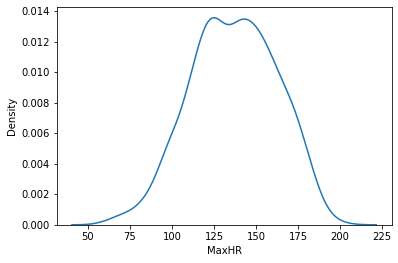

In [24]:
sns.kdeplot(ml_df['MaxHR'])

In [25]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

Values look normal 

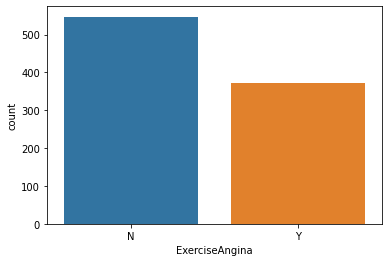

In [26]:
sns.countplot(x="ExerciseAngina", data=ml_df);


In [27]:
df['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

Text(0.5, 1.0, 'Oldpeak')

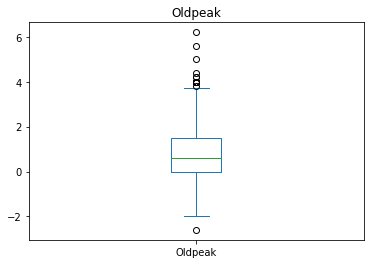

In [28]:
ml_df['Oldpeak'].plot(kind='box')
plt.title('Oldpeak')


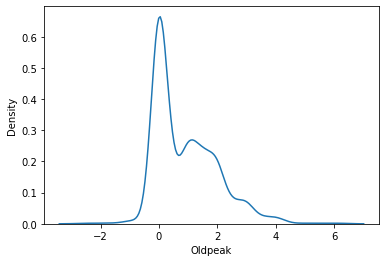

In [29]:
sns.kdeplot(ml_df['Oldpeak'])

**We can see by the data's distribution that it is not a normal distribution** 

#Identify Outliers 
-2 is an Outlier that is clearly skewing our results. 

Values look normal

In [30]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

Values look normal 

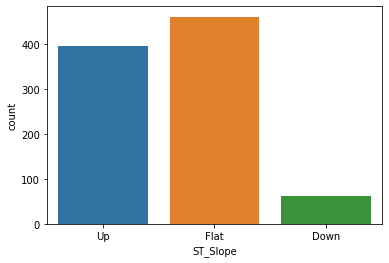

In [31]:
sns.countplot(x="ST_Slope", data=ml_df);


Distribution of the ST SLope 

In [32]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Values look normal 

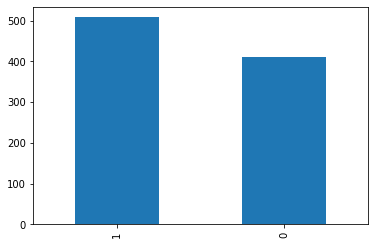

In [33]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

Proprtion of those with Heart Disease.

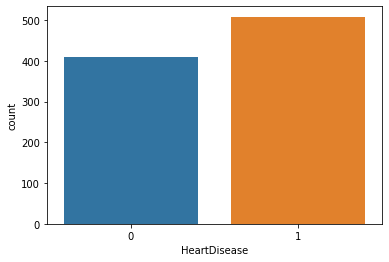

In [34]:
sns.countplot(x="HeartDisease", data=ml_df);


In [35]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#Convert 0s to Nan so the simple imputer can impute it properly. 

In [36]:
ml_df['Cholesterol'] = ml_df['Cholesterol'].replace(0, np.nan)

###Select Target + Features Matrix

In [37]:
X= ml_df.drop(columns='HeartDisease')
y = ml_df['HeartDisease']

###Instantiate Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Prepare Preprocessing tool 

In [39]:
#instantiate a scaler 
scaler = StandardScaler()

In [40]:
# instantiate One Hot Encoder 
encoder = OneHotEncoder(handle_unknown ='ignore')

In [41]:
#Make a Categorical column selector 
#Make a selector for categorical columns 
num_selector = make_column_selector(dtype_include ='number')

In [42]:
# instantiate a Simple imputer with the most frequent strategy 
mean_imputer = SimpleImputer(strategy='mean')

In [43]:
#Make a pipeline for numerical data 
num_processor = make_pipeline(mean_imputer, scaler)


In [46]:
#There are no missing values for numerical data but I will scale the numerical columns 
#num_processor = make_pipeline(scaler)

In [44]:
#make a tuple for categorical data 
num_tuple = (num_processor, num_selector )

####Make a Preprocessing tool

In [45]:
column_transformer = make_column_transformer( num_tuple, remainder='passthrough')

###Impute the 0s in the column Cholsterol

In [46]:
#Fit to train data 
column_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ff253d190>)])

In [47]:
ml_df['Cholesterol'].value_counts()

254.0    11
223.0    10
220.0    10
216.0     9
230.0     9
         ..
347.0     1
365.0     1
412.0     1
491.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64